In [ ]:
import os
import glob
import torch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

os.makedirs('final-images', exist_ok=True)

## CIFAR-10

In [3]:
dataset = 'cifar10'
lrs = [
    float(file[file.find('=') + 1:file.find('_wd')])
    for file in glob.glob(
        f'log-PT-{dataset}-vit_small_si-adam-aug/PT_{dataset}_vit_small_si_plr=*_wd=0.0001_warmup=0.csv'
    )
]
lrs = sorted(lrs)

In [4]:
pt_accs = []
pt_tr_losses = []
for lr in lrs:
    f = f'log-PT-{dataset}-vit_small_si-adam-aug/PT_{dataset}_vit_small_si_plr={lr}_wd=0.0001_warmup=0.csv'
    data = pd.read_csv(f)

    pt_accs.append(data.loc[:, 'val_acc'].tolist())
    pt_tr_losses.append(data.loc[:, 'train_loss'].tolist())
pt_accs = np.array(pt_accs)
pt_tr_losses = np.array(pt_tr_losses)

ft_accs = []
flrs = [1e-5, 2e-5, 5e-5, 1e-4]
for flr in flrs:
    flr_accs = []
    for lr in lrs:
        f = f'log-FT-{dataset}-vit_small_si-adam-aug/'\
            f'FT_{dataset}_vit_small_si_plr={lr}_flr={flr}_wd=0.0001_warmup=0.csv'
        data = pd.read_csv(f)

        flr_accs.append(data.loc[:, 'val_acc'].tolist())
    ft_accs.append(flr_accs)

ft_accs = np.array(ft_accs)

In [5]:
cols = sns.color_palette('gist_rainbow', 30)
cols = [cols[0], cols[4], cols[12], cols[21]]
sns.set_palette(sns.color_palette(cols))
cols = sns.color_palette(cols)
cols

[(1.0, 0.007419183889772136, 0.0),
 (1.0, 0.706942236354001, 0.0),
 (0.0, 1.0, 0.1054185114906178),
 (0.0, 0.32715260017050274, 1.0)]

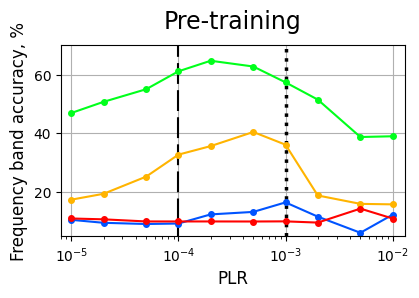

In [6]:
group_accs = np.load(f'data-npy/vit_small_si-{dataset}-plr.npy')
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

bands = ['0', '1-8', '9-24', '25-32']
colors = cols[::-1]

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for j in range(1, 5):
    ax.plot(lrs, 100 * group_accs[..., j].mean(1),
            color=colors[j - 1], marker='o', label=bands[j - 1], alpha=1, markersize=4)

handles, labels = ax.get_legend_handles_labels()
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_xscale('log')
ax.set_ylabel('Frequency band accuracy, %', fontsize=12)
ax.set_ylim((5, 70))
ax.set_xlim((8e-6, 1.3e-2))
ax.set_title('Pre-training', fontsize=17, pad=12)
plt.savefig(f'final-images/vit_small-{dataset}-group_accs-plr.pdf', bbox_inches='tight')

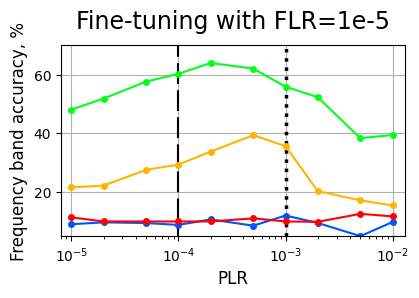

In [7]:
flr = 1e-5
group_accs = np.load(f'data-npy/vit_small_si-{dataset}-flr={flr}.npy')
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

bands = ['0', '1-8', '9-24', '25-32']
colors = cols[::-1]

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for j in range(1, 5):
    ax.plot(lrs, 100 * group_accs[..., j].mean(1),
            color=colors[j - 1], marker='o', label=bands[j - 1], alpha=1, markersize=4)

handles, labels = ax.get_legend_handles_labels()
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_xscale('log')
ax.set_ylabel('Frequency band accuracy, %', fontsize=12)
ax.set_ylim((5, 70))
ax.set_xlim((8e-6, 1.3e-2))
ax.set_title('Fine-tuning with FLR=1e-5', fontsize=17, pad=12)
plt.savefig(f'final-images/vit_small-{dataset}-group_accs-flr=1e-5.pdf', bbox_inches='tight')

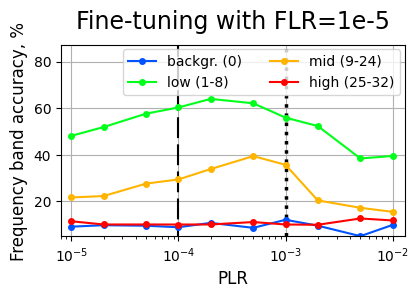

In [8]:
flr = 1e-5
group_accs = np.load(f'data-npy/vit_small_si-{dataset}-flr={flr}.npy')
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

bands = ['backgr. (0)', 'low (1-8)', 'mid (9-24)', 'high (25-32)']
colors = cols[::-1]

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for j in range(1, 5):
    ax.plot(lrs, 100 * group_accs[..., j].mean(1),
            color=colors[j - 1], marker='o', label=bands[j - 1], alpha=1, markersize=4)

handles, labels = ax.get_legend_handles_labels()
ax.grid()
ax.legend(loc=(0.18, 0.74), ncol=2)
ax.set_xlabel('PLR', fontsize=12)
ax.set_xscale('log')
ax.set_ylabel('Frequency band accuracy, %', fontsize=12)
ax.set_ylim((5, 87))
ax.set_xlim((8e-6, 1.3e-2))
ax.set_title('Fine-tuning with FLR=1e-5', fontsize=17, pad=12)
plt.savefig(f'final-images/vit_small-{dataset}-group_accs-flr=1e-5-short.pdf', bbox_inches='tight')

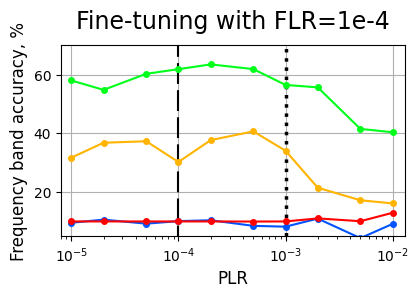

In [9]:
flr = 1e-4
group_accs = np.load(f'data-npy/vit_small_si-{dataset}-flr={flr}.npy')
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

bands = ['0', '1-8', '9-24', '25-32']
colors = cols[::-1]

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for j in range(1, 5):
    ax.plot(lrs, 100 * group_accs[..., j].mean(1),
            color=colors[j - 1], marker='o', label=bands[j - 1], alpha=1, markersize=4)

handles, labels = ax.get_legend_handles_labels()
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_xscale('log')
ax.set_ylabel('Frequency band accuracy, %', fontsize=12)
ax.set_ylim((5, 70))
ax.set_xlim((8e-6, 1.3e-2))
ax.set_title('Fine-tuning with FLR=1e-4', fontsize=17, pad=12)
plt.savefig(f'final-images/vit_small-{dataset}-group_accs-flr=1e-4.pdf', bbox_inches='tight')

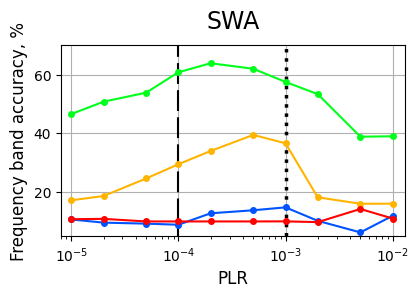

In [10]:
group_accs = np.load(f'data-npy/vit_small_si-{dataset}-swa=5.npy')
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

bands = ['0', '1-8', '9-24', '25-32']
colors = cols[::-1]

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for j in range(1, 5):
    ax.plot(lrs, 100 * group_accs[..., j].mean(1),
            color=colors[j - 1], marker='o', label=bands[j - 1], alpha=1, markersize=4)

handles, labels = ax.get_legend_handles_labels()
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_xscale('log')
ax.set_ylabel('Frequency band accuracy, %', fontsize=12)
ax.set_ylim((5, 70))
ax.set_xlim((8e-6, 1.3e-2))
ax.set_title('SWA', fontsize=17, pad=12)
plt.savefig(f'final-images/vit_small-{dataset}-group_accs-swa.pdf', bbox_inches='tight')

In [13]:
cols = sns.color_palette('gist_rainbow', 30)
cols = [cols[0], cols[8], cols[18], cols[26]]
sns.set_palette(sns.color_palette(cols))
cols = sns.color_palette(cols)
cols

[(1.0, 0.007419183889772136, 0.0),
 (0.5935347111817703, 1.0, 0.0),
 (0.0, 0.8599744245524292, 1.0),
 (0.546675191815857, 0.0, 1.0)]

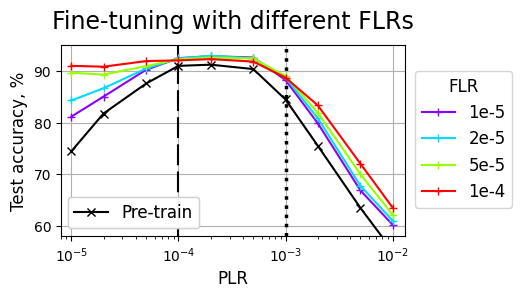

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

for i, flr in enumerate(flrs):
    ax.plot(lrs, ft_accs[i, :, -1], color=cols[::-1][i], marker='+', label=f'{flr:.1e}'.replace('.0e-0', 'e-'), alpha=1)

ax.plot(lrs, pt_accs[:, -1], color='black',
        marker='x', label='Pre-train')

ax.set_xscale('log')
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_ylabel('Test accuracy, %', fontsize=12)
ax.set_title('Fine-tuning with different FLRs', fontsize=17, pad=12)
ax.set_ylim((58, 95))
ax.set_xlim((8e-6, 1.3e-2))

handles, labels = ax.get_legend_handles_labels()
labels = ['Pre-train'] + labels
legend = ax.legend(handles[:-1], labels[1:], loc=(1.03,0.15), fontsize=12, title='FLR')
legend_stars = ax.legend([handles[-1]], [labels[0]],loc=(0.02,0.04),fontsize=12)
legend.get_title().set_fontsize('12')
ax.add_artist(legend)
ax.add_artist(legend_stars)

plt.savefig(f'final-images/vit_small-{dataset}-ft.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

In [19]:
swa_2_accs = np.load(f'data-npy/vit_small_si-{dataset}-swa=2.npy')[:, 0, 0]
swa_5_accs = np.load(f'data-npy/vit_small_si-{dataset}-swa=5.npy')[:, 0, 0]
swa_10_accs = np.load(f'data-npy/vit_small_si-{dataset}-swa=10.npy')[:, 0, 0]

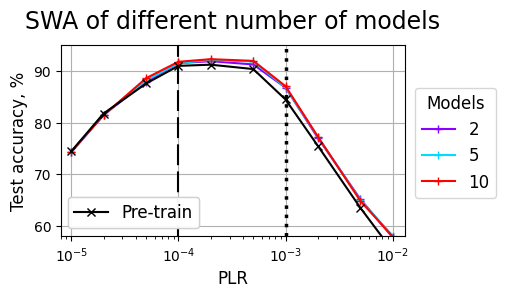

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
plt.tight_layout()

ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)

ax.plot(lrs, 100 * swa_2_accs, color=cols[-1], marker='+', label=f'2', alpha=1)
ax.plot(lrs, 100 * swa_5_accs, color=cols[2], marker='+', label=f'5', alpha=1)
ax.plot(lrs, 100 * swa_10_accs, color=cols[0], marker='+', label=f'10', alpha=1)
ax.plot(lrs, pt_accs[..., -1], color='black',
        marker='x', label='Pre-train')

ax.set_xscale('log')
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_ylabel('Test accuracy, %', fontsize=12)
ax.set_title('SWA of different number of models', fontsize=17, pad=12)
ax.set_ylim((58, 95))
ax.set_xlim((8e-6, 1.3e-2))

handles, labels = ax.get_legend_handles_labels()
labels = ['Pre-train'] + labels
legend = ax.legend(handles[:-1], labels[1:],loc=(1.03,0.2),fontsize=12,title='Models')
legend_stars = ax.legend([handles[-1]], [labels[0]],loc=(0.02,0.04),fontsize=12)
legend.get_title().set_fontsize('12')
ax.add_artist(legend)
ax.add_artist(legend_stars)

plt.savefig(f'final-images/vit_small-{dataset}-swa.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

In [21]:
angles, train_errors, test_errors, train_barriers, test_barriers = \
    torch.load(f'data-npy/vit_small_si-{dataset}-geometry.pt')

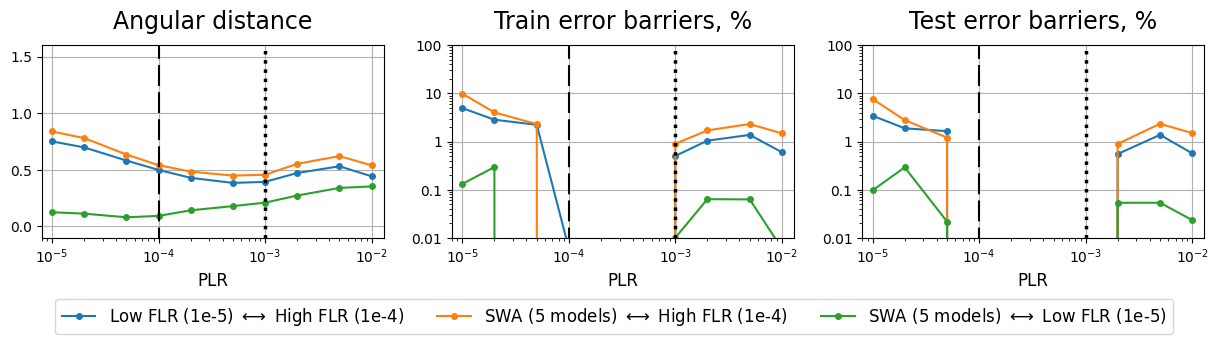

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(6 * 3 / 1.2, 3 / 1.2))
sns.set_palette("tab10")

flr1, flr2 = 1e-5, 1e-4
labels = [
    f'Low FLR ({flr1:.1e}) $\longleftrightarrow$ High FLR ({flr2:.1e})'.replace('.0e-0', 'e-'),
    f'SWA (5 models) $\longleftrightarrow$ High FLR ({flr2:.1e})'.replace('.0e-0', 'e-'),
    f'SWA (5 models) $\longleftrightarrow$ Low FLR ({flr1:.1e})'.replace('.0e-0', 'e-')
]

for i in range(3):
    m = angles[2 - i, :-1]
    axs[0].plot(lrs, m, marker='o', alpha=1, label=labels[i], markersize=4)
    axs[0].fill_between(lrs, m, m, alpha=0.2)

    m = 100 * train_barriers[2 - i, :-1]
    axs[1].plot(lrs, m, marker='o', alpha=1, label=labels[i], markersize=4)

    m = 100 * test_barriers[2 - i, :-1]
    axs[2].plot(lrs, m, marker='o', alpha=1, label=labels[i], markersize=4)

for ax in axs:
    ax.set_xscale('log')
    ax.grid()
    ax.set_xlabel('PLR', fontsize=12)
    ax.set_xticks([1e-5, 1e-4, 1e-3, 1e-2])
    ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
    ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)
    ax.set_xlim((8e-6, 1.3e-2))

axs[0].set_ylim((-0.1, 1.6))
for ax in axs[1:]:
    ax.set_yscale('log')
    ax.set_ylim((0.01, 100))
    ax.set_yticks([0.01, 0.1, 1, 10, 100], ['0.01', '0.1', '1', '10', '100'])

axs[0].set_title('Angular distance', fontsize=17, pad=12)
axs[1].set_title('Train error barriers, %', fontsize=17, pad=12)
axs[2].set_title('Test error barriers, %', fontsize=17, pad=12)
axs[0].legend(loc=(0.04,-0.5), ncol=3, fontsize=12)
plt.subplots_adjust(wspace=0.2)
plt.savefig(f'final-images/vit_small-{dataset}-geometry.pdf', bbox_inches='tight')

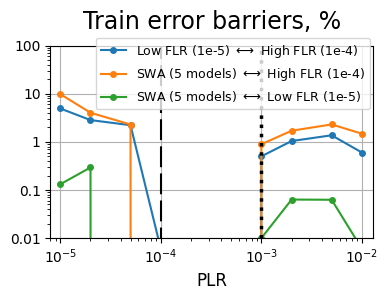

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6 / 1.2 / 1.2, 3 / 1.2))
sns.set_palette("tab10")

flr1, flr2 = 1e-5, 1e-4
labels = [
    f'Low FLR ({flr1:.1e}) $\longleftrightarrow$ High FLR ({flr2:.1e})'.replace('.0e-0', 'e-'),
    f'SWA (5 models) $\longleftrightarrow$ High FLR ({flr2:.1e})'.replace('.0e-0', 'e-'),
    f'SWA (5 models) $\longleftrightarrow$ Low FLR ({flr1:.1e})'.replace('.0e-0', 'e-')
]

for i in range(3):
    m = 100 * train_barriers[2 - i, :-1]
    ax.plot(lrs, m, marker='o', alpha=1, label=labels[i], markersize=4)

ax.set_xscale('log')
ax.grid()
ax.set_xlabel('PLR', fontsize=12)
ax.set_xticks([1e-5, 1e-4, 1e-3, 1e-2])
ax.axvline(1e-4, color='black', linestyle=(5, (10, 3)))
ax.axvline(1e-3, color='black', linestyle=':', linewidth=2.5)
ax.set_xlim((8e-6, 1.3e-2))

ax.set_yscale('log')
ax.set_ylim((0.01, 100))
ax.set_yticks([0.01, 0.1, 1, 10, 100], ['0.01', '0.1', '1', '10', '100'])

ax.set_title('Train error barriers, %', fontsize=17, pad=12)
ax.legend(loc=(0.14, 0.67), ncol=1, fontsize=9)
plt.subplots_adjust(wspace=0.2)
plt.savefig(f'rebuttal-images/vit_small-{dataset}-train_barriers.pdf', bbox_inches='tight')